In [53]:
#Importing the DataSet
from sklearn.datasets import fetch_california_housing

In [54]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Analysing the Dataset

In [55]:
df= fetch_california_housing()
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [56]:
type(df)

sklearn.utils._bunch.Bunch

In [57]:
#description of the dataset
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [58]:
print(df.target_names)

['MedHouseVal']


In [59]:
df.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [60]:
print(df.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [61]:
df.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Creating the dataset and preprocessing

In [62]:
dataframe=pd.DataFrame(df.data, columns=df.feature_names)
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [63]:
dataframe["Price"]=df.target
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [64]:
dataframe.info()
print(dataframe.isnull().sum())
print(dataframe.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std    

In [65]:
dataframe.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

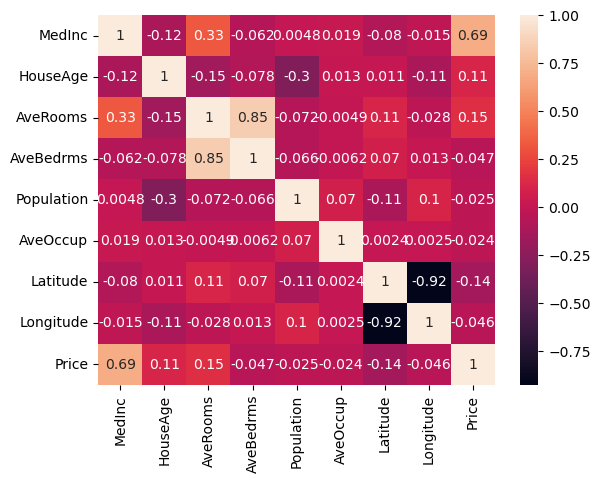

In [66]:
sns.heatmap(dataframe.corr(),annot=True)

In [67]:
X=dataframe.iloc[:,:-1]
y=dataframe.iloc[:,-1]

In [68]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [69]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=31)

In [71]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Creating Model

In [73]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor

LinearRegression()

In [74]:
regressor.fit(X_train,y_train)

LinearRegression()

In [75]:
regressor.coef_, regressor.intercept_

(array([ 0.83060952,  0.11868294, -0.27227523,  0.31579869, -0.00441432,
        -0.04009636, -0.90765014, -0.87568102]),
 2.071535833938961)

In [76]:
y_pred=regressor.predict(X_test)
y_pred

array([1.54437818, 2.2259289 , 2.17228622, ..., 0.72827437, 3.97327877,
       1.62721245])

In [77]:
#Evaluation of model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(f"Mean Absolute error={mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared error={mean_squared_error(y_test,y_pred)}")
print(f"Root mean squared error={np.sqrt(mean_squared_error(y_test,y_pred))}")

Mean Absolute error=0.5272533316379394
Mean Squared error=0.5209426103218227
Root mean squared error=0.721763541834736


In [78]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("R2 score",score)

R2 score 0.6030139017639451


Visualization of results


Text(0, 0.5, 'Predicted test data')

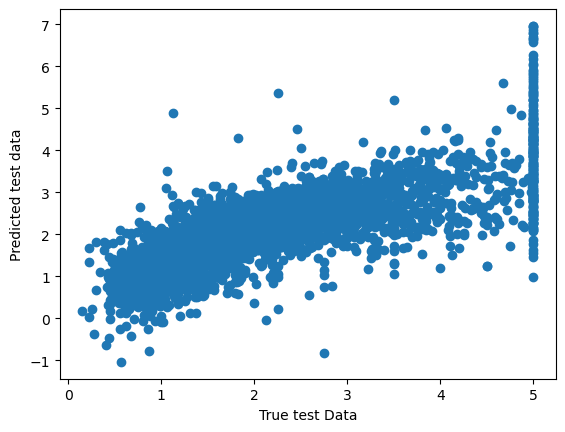

In [79]:
plt.scatter(y_test,y_pred)
plt.xlabel("True test Data")
plt.ylabel("Predicted test data")

In [80]:
residuals=y_test-y_pred
residuals

15430   -0.069378
10950   -0.645929
14574    0.858714
9603    -0.488279
6005    -0.497494
           ...   
4893    -0.515000
7691     1.421258
11863    0.207726
17470    0.348721
9502    -0.617212
Name: Price, Length: 4128, dtype: float64

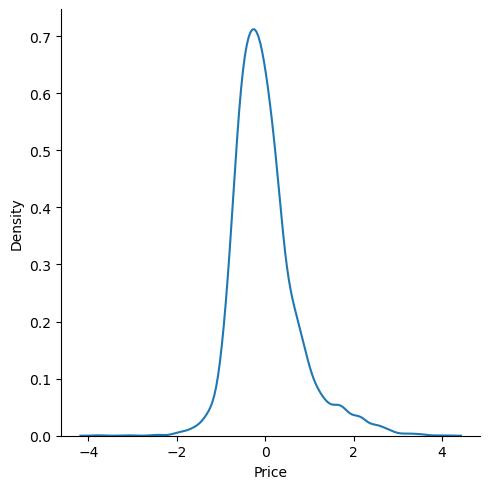

In [81]:
sns.displot(residuals,kind="kde")

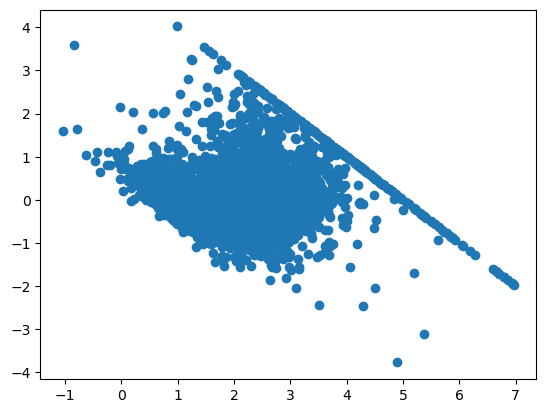

In [82]:
plt.scatter(y_pred, residuals) #checking the uniform distribution or not

**Pickling for deployment**

In [83]:
import pickle
pickle.dump(regressor,open("regressor.pkl",'wb'))

In [85]:
model=pickle.load(open('regressor.pkl','rb'))

In [86]:
model.predict(X_test)

array([1.54437818, 2.2259289 , 2.17228622, ..., 0.72827437, 3.97327877,
       1.62721245])